# FORECASTING HIGH-VALUE ZIPCODES BY UTILIZING TIME SERIES ANALYSIS

#### INTRODUCTION.

In the dynamic world of real estate investments, strategic decision-making is crucial for achieving success and maximizing returns. With the advent of advanced data analytics techniques, such as time series modeling, investors now have powerful tools at their disposal to forecast market trends and identify lucrative opportunities

 ![Modern Residential District](4-modern-doral-model-60-exterior.jpeg)


#### PHASE 4 GROUP 1

## SUMMARY:

In this project, we delve into the domain of real estate investment by harnessing the wealth of information provided by the https://www.zillow.com/research/data/ to unlock actionable insights for prospective investors.

## 1. BUSINESS UNDERSTANDING.
STAKEHOLDER; PROSPECT PROPERTY INVESTMENTS.
Our client is an investor with a budget of 300,000 dollars who, after reading articles such as   (https://www.worldbizmagazine.net/post/miami-dade-best-region-in-north-america-for-investment-2021-2022), believes that Miami-Dade County presents the most promising investment opportunities in North America. Inspired by these insights, they seek to leverage data science and real estate expertise to make informed investment decisions in the area.

## BUSINESS PROBLEM:
The client aims to capitalize on the potential highlighted in the articles by identifying lucrative investment opportunities within Miami-Dade County. Specifically, they are interested in properties with high returns on investment (ROI) within a 3-year timeframe.

#### BUSINESS OBJECTIVE:

1.Identify properties in Miami-Dade County with the potential for high ROI within a 3-year timeframe.

2.Analyze historical data, market trends, and economic indicators to forecast future property values and ROI accurately.

3.Provide actionable recommendations to the client based on the analysis to maximize investment returns and minimize risks.

#### RESEARCH QUESTIONS.

1.What are the historical trends in property values and ROI in Miami-Dade County, as highlighted in the articles?

2.How do market trends and economic indicators influence property values and ROI in the area?

3.How reliable are the forecasting models in predicting future property values and ROI in Miami-Dade County?

4.Which specific properties or neighborhoods in Miami-Dade County offer the highest potential for ROI within a 3-year timeframe, considering the insights from the articles?

Addressing these questions will enable Prospect Property Investments to align their investment strategies with the opportunities presented in Miami-Dade County and maximize returns for their client.

## 2. DATA UNDERSTANDING

#### Dataset Summary

RegionID - This is unique Id for the Regions.

SizeRank - This is the ranking done based on the size of the Region.

RegionName - This field contains the zip code of the Region.

RegionType - Type of Region is Zip.

StateName - State.

City - This column provide the specific City Name of Housing Data.

Metro - This provide the name of the metro city around that Region.

County Name - This is the County Name for that Region.

Months Column - These Columns contains the prices of Region for every month.



#### Why is this dataset suitable?

The selected dataset for this real estate analysis project contains a broad range of features spanning from April 1996 to April 2018.Furthermore with the business understanding and objectives outlined it it important that prospect property investments select dataset that aligns with the clients need and facilitate the achivement of their business goals.Below is a detailed justification for why zillow dataset is suitable:

##### 1.Feature Relevance:
The dataset provides key information essential for assessing investment properties in Miami-Dade County, including property size, location, amenities, historical sales data, and neighborhood demographics. These features help us understand property values and ROI, enabling us to prioritize properties with the greatest potential for returns.

##### 2.Problem Relevance:
The dataset aligns closely with Prospect Property Investments' goal of pinpointing high ROI properties within a 3-year window in Miami-Dade County. With features like historical sales data and market trends, it enables analyzing past performance and spotting patterns for future profitability. This directly tackles the stakeholder's business problem, facilitating data-driven property investment decisions.

##### 3.Duration Coverage:
The dataset's extensive duration coverage spanning from April 1996 to April 2018 provides a rich historical perspective essential for understanding long-term trends in property values and ROI. This historical context is particularly valuable for forecasting future property values and identifying investment opportunities aligned with the clients 3-year timeframe. Additionally, it enables the evaluation of market dynamics across different economic cycles, enhancing the robustness of the analysis.

##### 4.Analytical Opportunities:
With the dataset's temporal coverage and comprehensive feature set, there are ample opportunities for advanced analytical techniques to address the research questions posed by Prospect Property Investments. Time series analysis can be employed to uncover historical trends in property values and ROI, while predictive modeling techniques can forecast future property values based on market trends and economic indicators. Moreover, the dataset allows for granular analysis at the neighborhood level, enabling the identification of specific properties or areas with the highest potential for ROI within the stakeholder's investment horizon.

# Step 1. LOAD DATA/ FILTER FOR CHOOSEN ZIPCODES.

#### 1.1  Importing Necessary Libraries 

The pmdarima library, also known as Pyramid ARIMA, is used for automatic ARIMA model selection.It provides a convenient interface for fitting ARIMA models to time series data and automatically selecting the optimal parameters based on information criteria

In [1]:
!pip install pmdarima

In [2]:
#Data Manipulation and Analysis
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations

#Time Series Analysis and Forecasting
import pmdarima as pm # For automatic ARIMA model selection
from statsmodels.tsa.holtwinters import ExponentialSmoothing # For Holt-Winters Exponential Smoothing
from statsmodels.tsa.arima_model import ARIMA # For Autoregressive Integrated Moving Average (ARIMA) modeling
from statsmodels.tsa.statespace.sarimax import SARIMAX # For Seasonal Autoregressive Integrated Moving Average with Exogenous Regressors (SARIMAX)
from statsmodels.tsa.seasonal import seasonal_decompose # For decomposition of time series data
from statsmodels.graphics.tsaplots import plot_acf # For plotting autocorrelation function (ACF)
from statsmodels.graphics.tsaplots import plot_pacf # For plotting partial autocorrelation function (PACF)
from sklearn.model_selection import TimeSeriesSplit # For cross-validation on time series data

#Data Visualization
import matplotlib.pyplot as plt # For creating visualizations
import seaborn as sns # For statistical data visualization


#Other
import warnings # For ignoring warnings
warnings.filterwarnings("ignore")# Filter warnings
import matplotlib.dates as mdates # For formatting dates in plots
from sklearn.metrics import mean_squared_error # For calculating mean squared error
import statsmodels.api as sm # For time series analysis
from statsmodels.tsa.stattools import adfuller # For Augmented Dickey-Fuller test
from math import sqrt # For mathematical functions

#### 1.2 Loading the Dataset
Let us import our data and take a look at the dataset we get to work with.load the data using the pd.read_csv method and save to the variable name df.

In [3]:
#load dataset into pandas dataframe and view the first 5 rows by calling the df variable.
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


#### 1.3 Inspecting the dataset

In [4]:
#inspect how many rows and columns the data set has 
num_rows, num_cols = df.shape

print("numbers of rows:", num_rows)
print("numbers of columns:", num_cols)

numbers of rows: 14723
numbers of columns: 272


This dataset appears to contain real estate price information for various regions, including the region ID, region name, city, state, metro area, county name, and size rank. The dataset also includes price data for each region spanning from April 1996 to April 2018.The years in this dataset are presented in a wide format, where each column represents a specific month and year combination.this will need to be converted to long-format. This conversion can typically be done using functions like pd.melt()

In [5]:
#inspect the dataset info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


# Step 2: DATA PREPROCESSING

Given our client's interest in investing in Miami-Dade County, we will narrow down the dataset to exclusively encompass records within this particular region.

#### 2.1 FILTER FOR CHOOSEN ZIPCODES

In [6]:
#retrieve the datframe that contains the zipcodes from Miami_dade county
new_df = df[df['CountyName']=='Miami-Dade']

#red the new_df dataframe
new_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
60,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale,Miami-Dade,61,337300.0,337900.0,338300.0,...,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
84,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,480200.0,480700.0,481200.0,...,2917100,2925700,2942400,2958300,2946300,2912900,2900900,2923300,2933600,2914100
222,72488,33186,The Crossings,FL,Miami-Fort Lauderdale,Miami-Dade,223,120600.0,120500.0,120500.0,...,310600,311800,313700,314800,315300,317500,320700,322800,323900,324500
226,72350,33012,Hialeah,FL,Miami-Fort Lauderdale,Miami-Dade,227,118400.0,118500.0,118500.0,...,300300,302100,304500,306400,307200,308900,311400,314100,317500,320500
376,72460,33157,Village of Palmetto Bay,FL,Miami-Fort Lauderdale,Miami-Dade,377,106400.0,106600.0,106800.0,...,295600,298300,301600,304400,305900,307500,309700,312500,316400,319800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,72473,33170,Goulds,FL,Miami-Fort Lauderdale,Miami-Dade,8157,89500.0,89300.0,89000.0,...,247100,249700,252500,254300,254700,255800,257700,259300,261800,264400
8568,72484,33182,Tamiami,FL,Miami-Fort Lauderdale,Miami-Dade,8569,135800.0,136100.0,136300.0,...,358100,359700,361100,362100,361400,361200,362900,363500,362500,362000
10524,72461,33158,Village of Palmetto Bay,FL,Miami-Fort Lauderdale,Miami-Dade,10525,233800.0,234200.0,234500.0,...,621700,619900,618000,616500,616700,618200,618500,621900,629500,634900
10580,72495,33194,Tamiami,FL,Miami-Fort Lauderdale,Miami-Dade,10581,133200.0,132900.0,132700.0,...,319700,321900,324100,325500,325400,325700,327200,327800,327400,327000


We can observe from the above dataframe that the County area is divided into smaller cities within it.

#### 2.2 Inspect data

In [7]:
#inspect the new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 60 to 10766
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 132.2+ KB


 Here's what our dataframe looks like.The dataframe has 62 rows and 272 columns.There are columns with float64, int64, and object data types.The numbers "60 to 10766" indicate the range of index values for the rows displayed in the DataFrame.It is showing rows starting from index 60 up to index 10766. 


In [8]:
# Check for null values in the dataset
null_values = new_df.isnull().sum()

# Display the null value counts
print("Null Values in the Dataset:")
print(null_values)

Null Values in the Dataset:
RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64


We can observe no missing(NaN) values in our dataset.

In [9]:
#check for dupicates
df.duplicated().sum()

0

Our dataset has 0 duplicated values

In [10]:
# Rename the column "RegionName" to "ZipCode"
new_df.rename(columns={'RegionName': 'Zipcode'}, inplace=True)

# convert to categorical dtype
new_df['Zipcode'] = new_df['Zipcode'].astype('str')

# Display the DataFrame with the updated column name
new_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
60,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale,Miami-Dade,61,337300.0,337900.0,338300.0,...,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
84,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,480200.0,480700.0,481200.0,...,2917100,2925700,2942400,2958300,2946300,2912900,2900900,2923300,2933600,2914100
222,72488,33186,The Crossings,FL,Miami-Fort Lauderdale,Miami-Dade,223,120600.0,120500.0,120500.0,...,310600,311800,313700,314800,315300,317500,320700,322800,323900,324500
226,72350,33012,Hialeah,FL,Miami-Fort Lauderdale,Miami-Dade,227,118400.0,118500.0,118500.0,...,300300,302100,304500,306400,307200,308900,311400,314100,317500,320500
376,72460,33157,Village of Palmetto Bay,FL,Miami-Fort Lauderdale,Miami-Dade,377,106400.0,106600.0,106800.0,...,295600,298300,301600,304400,305900,307500,309700,312500,316400,319800


#### 2.3 date to date-time
We begin by converting the column names in the dataframe that represent dates into datetime objects.This conversion allows for easier manipulation and analysis of time-series data. By converting the column names to datetime objects, we can perform various time-based operations such as filtering by date range, resampling at different frequencies, and plotting time-series data accurately.

In [11]:
#The get_datetimes function takes a DataFrame as input and returns only those column names that can be converted into datetime objects
def get_datetimes(new_df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(new_df.columns.values[1:], format='%Y-%m')

#### 2.4 how many cities are in Miami-Dade?
 is crucial for real estate Prospect Property Investments. Knowing the number of cities helps assess market diversity, tailor investment strategies, and prioritize decisions based on local dynamics. This foundational understanding is essential for identifying investment opportunities and maximizing returns within Miami-Dade County.

In [12]:
# Get unique cities in Miami-Dade County
unique_cities = new_df['City'].unique()

# Count the number of unique cities
num_cities = len(unique_cities)

print("Number of cities in Miami-Dade County:", num_cities)


Number of cities in Miami-Dade County: 33


##### 2.5 how are  the zipcodes distributed among the cities?.
Analyzing zip code distribution in Miami-Dade County is crucial for investors like Prospect Property Investments. It reveals property density, growth potential, and market competitiveness across different cities. Understanding these dynamics helps in targeted investment strategies, diversification, and pricing decisions, ultimately maximizing returns in the local real estate market.

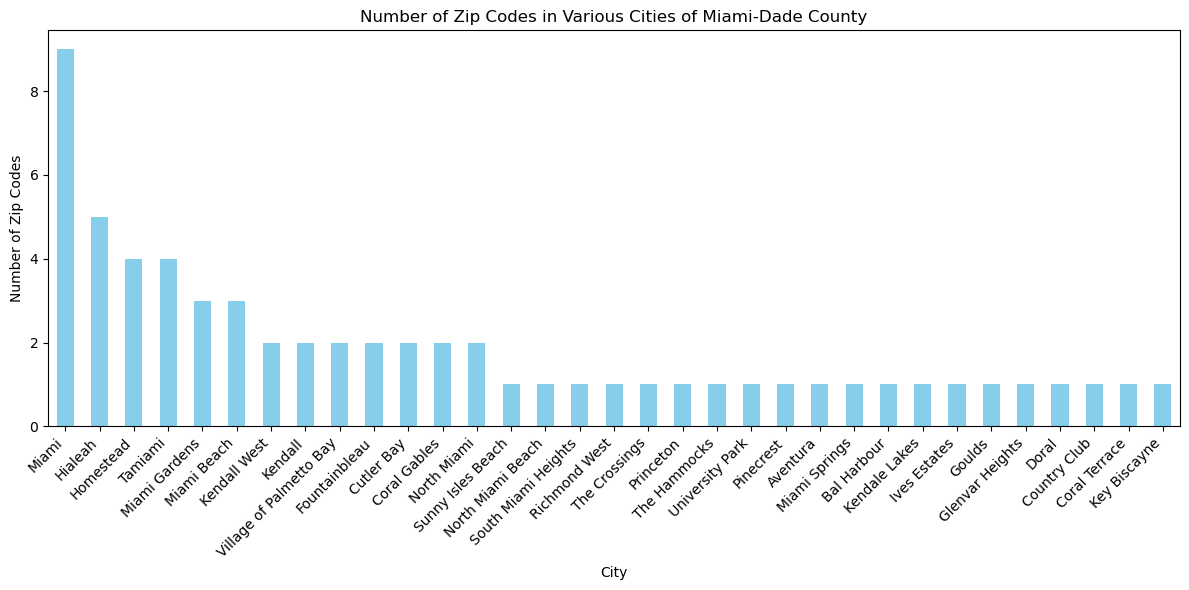

In [13]:
# Group the DataFrame by 'City' and count the number of zip codes in each city
zipcode_counts = new_df.groupby('City')['Zipcode'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
zipcode_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Zip Codes in Various Cities of Miami-Dade County')
plt.xlabel('City')
plt.ylabel('Number of Zip Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The above visualization shows that Miami has the highest number of Zipcode distributions.

#### 2.6 filtering the dataframe to include only zip codes with median house prices under 300,000 dollars.

Filtering the dataframe to include only zip codes with median house prices under 300,000 is essential because it aligns with the budget constraints of the client. By focusing on properties within this price range, the analysis becomes more relevant and actionable for the client's investment objectives.

In [14]:
# Filter the DataFrame to include only zip codes with median house prices under $300,000
budget_df = new_df[new_df['2018-04'] < 300000]
budget_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
838,72428,33125,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,839,98700.0,98700.0,98700.0,...,266400,267200,267800,268000,269000,270800,272400,275100,279700,282900
907,72371,33033,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,908,77100.0,77300.0,77400.0,...,197900,200200,203000,205900,207900,209700,212000,214800,218300,220800
1176,72429,33126,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1177,108600.0,108800.0,109100.0,...,283600,285300,288100,291000,292900,294300,295700,296900,298200,298800
1233,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,85800.0,85800.0,85800.0,...,270700,273000,275200,277600,278800,281000,284700,287800,289400,289800
1398,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,91200.0,91200.0,91100.0,...,262900,265100,268000,270600,272000,273900,276600,279000,280800,282000
2062,72348,33010,Hialeah,FL,Miami-Fort Lauderdale,Miami-Dade,2063,100300.0,100900.0,101500.0,...,260500,266200,272000,276400,279000,281500,284400,286100,287100,288400
2068,72370,33032,Princeton,FL,Miami-Fort Lauderdale,Miami-Dade,2069,87600.0,87400.0,87300.0,...,222500,225000,227500,229900,231400,232800,234500,235500,236600,237900
2451,72472,33169,Miami Gardens,FL,Miami-Fort Lauderdale,Miami-Dade,2452,82900.0,82900.0,82900.0,...,223900,226800,230000,233900,237300,239800,242500,244400,246000,246900
2458,72465,33162,North Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,2459,82300.0,82400.0,82500.0,...,238800,241300,244300,247500,250000,252100,254800,258000,261300,263300
2869,72387,33055,Miami Gardens,FL,Miami-Fort Lauderdale,Miami-Dade,2870,73000.0,73000.0,73000.0,...,229600,233000,236500,239800,242000,243900,247200,250300,252300,253300


#### 2.7 How many zipcodes are in each city?
his information is crucial for several reasons:

. Market Understanding: It helps investors understand the breadth and depth of the real estate market in each city. Cities with a higher number of zip codes may indicate a larger market size or more diverse housing options.

. Investment Focus: Knowing the distribution of zip codes allows investors to focus their attention on specific cities or areas within Miami-Dade County that offer the most potential for investment. They can prioritize areas with a higher concentration of zip codes for further analysis and investment consideration.

. Market Dynamics: Disparities in the number of zip codes among cities can reveal underlying market dynamics such as population density, economic activity, and development trends. Cities with more zip codes may experience higher market competition or greater demand for real estate.

. Risk Assessment: Understanding the distribution of zip codes helps in assessing investment risks. It allows investors to diversify their portfolio by investing in multiple cities or areas with different market characteristics, reducing exposure to localized risks.



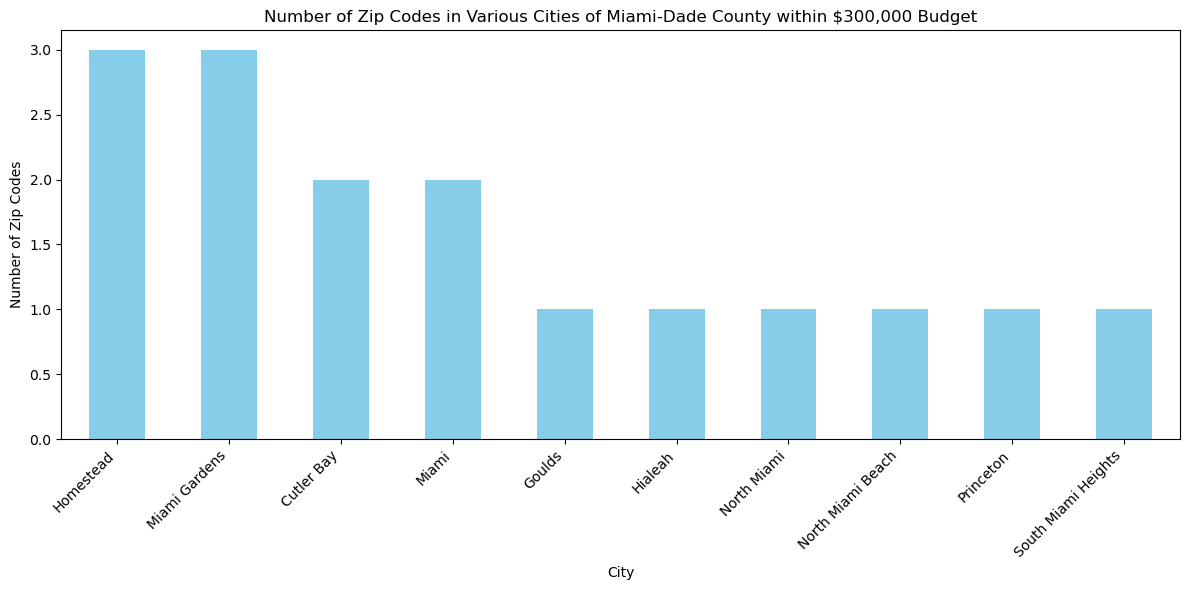

In [15]:
# Group the DataFrame by 'City' and count the number of zip codes in each city
zipcode_counts = budget_df.groupby('City')['Zipcode'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
zipcode_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Zip Codes in Various Cities of Miami-Dade County within $300,000 Budget')
plt.xlabel('City')
plt.ylabel('Number of Zip Codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#save the figure
plt.savefig('Zipcode_distrbution.png')

#show the plot
plt.show()


The above is a list of cities that fall under our clients budget of 300,000 dollars.With homestead and miami gardens having the highest number of zipcodes.

# Step 3: EDA and Visualization

#### 3.1 What is the price history of the MiamiDade county since 1996?

now to answer this question there are a few steps we will need to do:
1.Our data is currently in a wide format (each column representing a different time period), you may want to melt it into a long format where each row represents a unique observation (combination of date and zipcode).

2.For time series visualization, it's beneficial to have the date as the index column of your DataFrame. This makes it easier to plot the data over time.

Lets begin.



In [16]:
melted_df = pd.melt(budget_df, 
                    id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], 
                    var_name='Date', 
                    value_name='Price')

# Display the melted DataFrame
melted_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
0,72428,33125,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,839,1996-04,98700.0
1,72371,33033,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,908,1996-04,77100.0
2,72429,33126,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1177,1996-04,108600.0
3,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,1996-04,85800.0
4,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,1996-04,91200.0


In [17]:
#set date as dataset index
melted_df['Date'] = pd.to_datetime(melted_df['Date'])  # Convert 'Date' column to datetime format
melted_df.set_index('Date', inplace=True)  # Set 'Date' column as the index

# Check the index to confirm it's set correctly
melted_df.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=4240, freq=None)

In [18]:
melted_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Price
Date,,,,,,,,
1996-04-01,72428,33125,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,839,98700.0
1996-04-01,72371,33033,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,908,77100.0
1996-04-01,72429,33126,Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1177,108600.0
1996-04-01,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,85800.0
1996-04-01,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,91200.0
...,...,...,...,...,...,...,...,...
2018-04-01,72368,33030,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,4147,215600.0
2018-04-01,72491,33189,Cutler Bay,FL,Miami-Fort Lauderdale,Miami-Dade,5091,280800.0
2018-04-01,72373,33035,Homestead,FL,Miami-Fort Lauderdale,Miami-Dade,7278,197700.0


#### Q1.What are the historical trends in property values and ROI in Miami-Dade County, as highlighted in the articles?

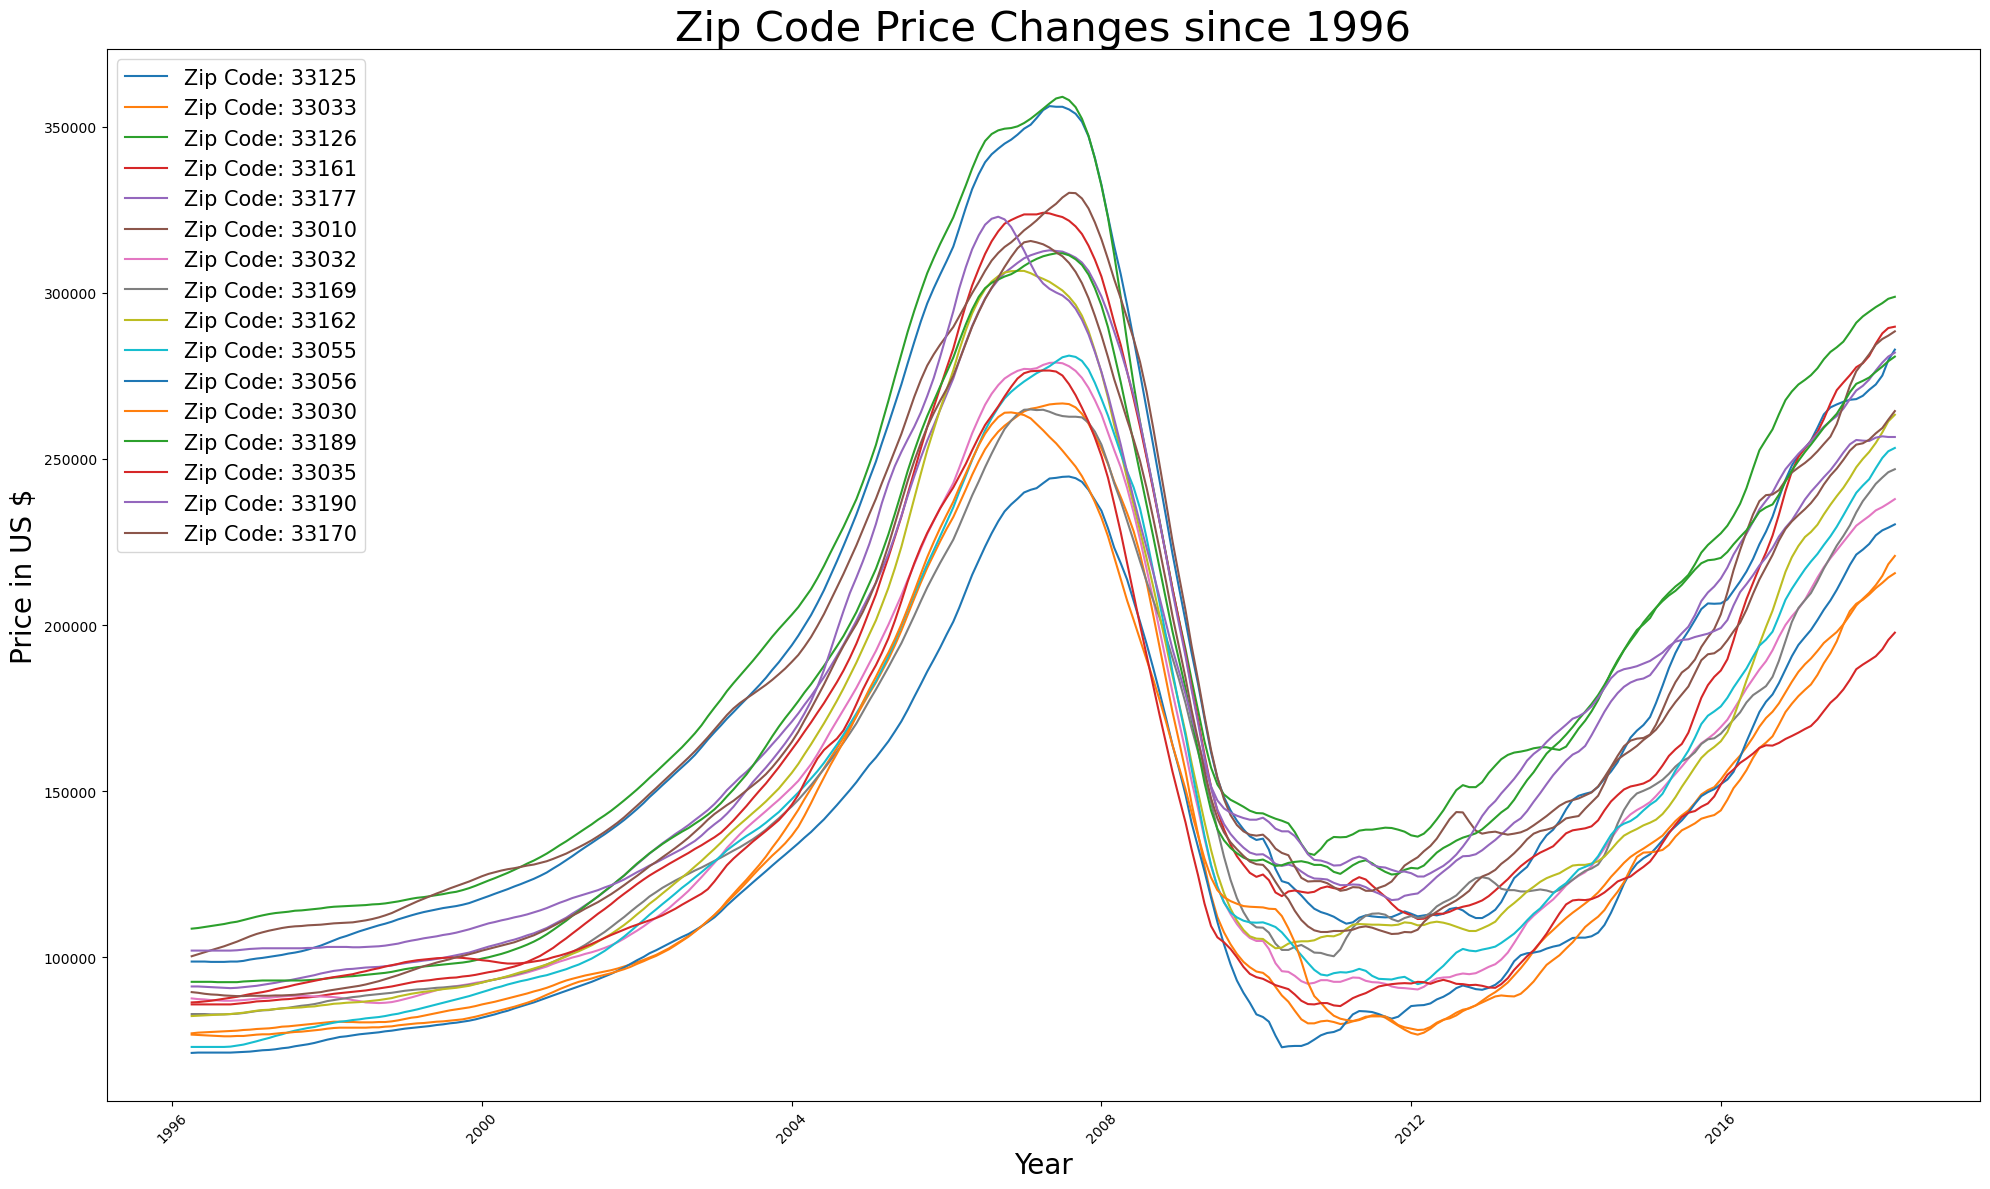

In [19]:
zip_dict = {}

for zipcode in melted_df['Zipcode'].unique():
    zip_dict[zipcode] = melted_df[melted_df['Zipcode'] == zipcode]['Price']

fig, ax = plt.subplots(figsize=(20, 12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode], label=f'Zip Code: {zipcode}')



ax.set_title('Zip Code Price Changes since 1996', fontsize=30)
ax.set_ylabel('Price in US $', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.legend(prop={'size': 15})
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('Zipcode_price_changes.png')

#show plot
plt.show()


From the visualization above, it's evident that there was a peak in housing prices just before the recession hit in 2008. This recession led to a significant decline in housing prices, but since around 2011, we've observed a gradual recovery with prices steadily rising. However, it's noteworthy that as of the latest data, housing prices have yet to reach the peak levels observed in 2007 before the recession occurred.

#### Q2.Which zip code/s exhibits the most substantial growth post-2007 recession, aligning with our objective of identifying the best-growing zip codes while minimizing risks associated with economic downturns such as recessions?

for us to get this information we begin by calculation %ROI and plotting the same.

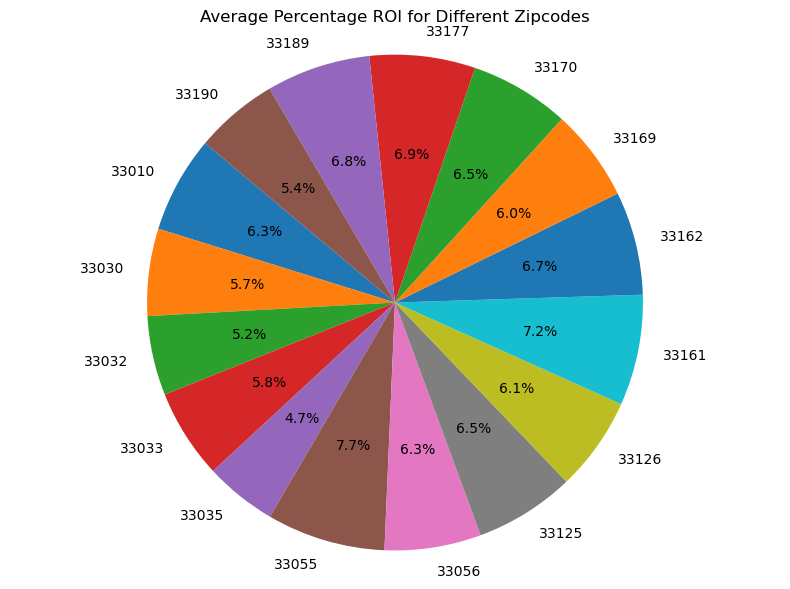

In [20]:
# Calculate ROI for melted_df
melted_df['ROI'] = ((melted_df['Price'] - melted_df.groupby('Zipcode')['Price'].transform('first')) / melted_df.groupby('Zipcode')['Price'].transform('first')) * 100

# Calculate mean ROI for each Zipcode
zipcode_roi = melted_df.groupby('Zipcode')['ROI'].mean()

# Calculate %ROI and save it as a new column
melted_df['%ROI'] = zipcode_roi.reindex(melted_df['Zipcode']).values

# Calculate ROI price and save it as a new column
melted_df['ROI Price'] = melted_df['Price'] * (melted_df['%ROI'] / 100)

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(zipcode_roi, labels=zipcode_roi.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Percentage ROI for Different Zipcodes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save figure
plt.savefig('Average_percentage_ROI.png')

# Show the plot
plt.show()


The above pie plot shows the zipcodes that had the highest steady growth after emerging from the 2007 recession.the order goes as follows;

1.zipcode 33055 had a percentage ROI of 7.7%

2.zipcode 33161 had a percentage ROI of 7.2%

3.zipcode 33177 had a percentage ROI of 6.9%

4.zipcode 33189 had a percentage ROI of 6.8%

5.zipcode 33162 had a percentage ROI of 6.7%

these are the 5 best perfoming Zipcodes. 


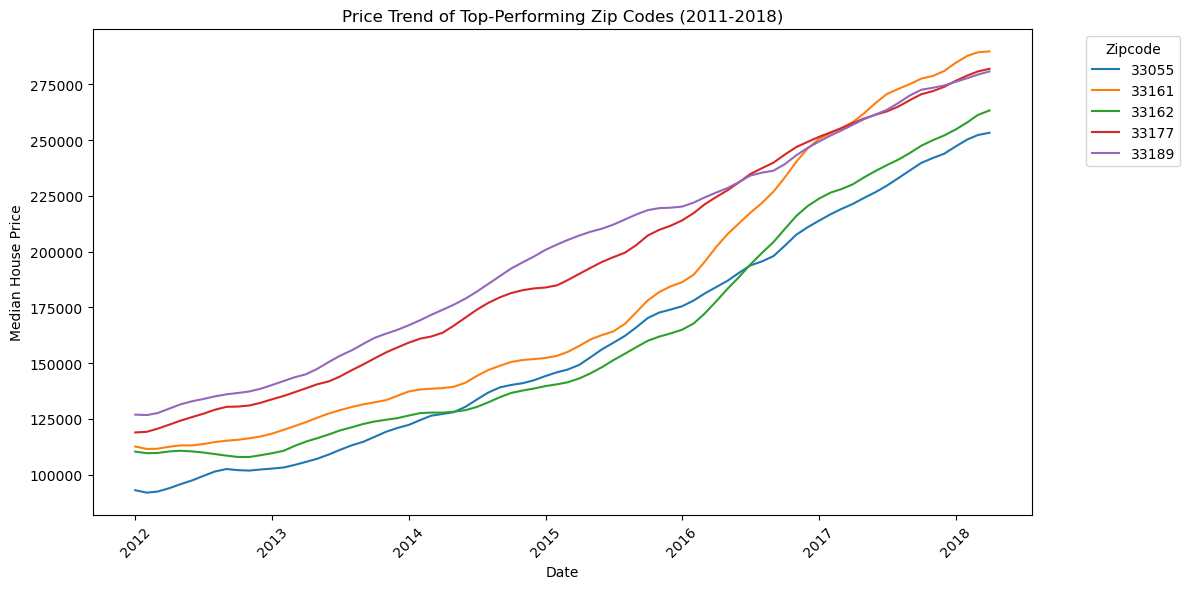

In [21]:
# Filter the data for the selected zip codes and time period
selected_zipcodes = ['33055', '33161', '33177', '33189', '33162']
start_date = '2012-01-01'
end_date = '2018-12-31'

filtered_df = melted_df[(melted_df['Zipcode'].isin(selected_zipcodes)) & 
                        (melted_df.index >= start_date) & 
                        (melted_df.index <= end_date)]

# Plot the trend of each zip code
plt.figure(figsize=(12, 6))
for zipcode, data in filtered_df.groupby('Zipcode'):
    plt.plot(data.index, data['Price'], label=zipcode)

plt.title('Price Trend of Top-Performing Zip Codes (2011-2018)')
plt.xlabel('Date')
plt.ylabel('Median House Price')
plt.legend(title='Zipcode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

#save the figure
plt.savefig('Top_zipcodes_price_trend.png')

#show plot
plt.show()


After we are done filtering and ranking the zipcodes that met all the criteria required by the client we ended with the below zipcodes.We again can recognise that zipcode 33189 had the best steady growth among all 5 zipcodes. 

# Step 4: Data preprocessing for the selected top 5 zipcodes.

Before fitting the a basic ARIMA model further data preprocessing needs to take place.When working with time series models, it's crucial to assume that the data is stationary. This assumption implies that the mean, variance, and autocorrelation of the data remain constant over time for each lag.

Stationary time series data is essential for efficient model development. Prior to modeling, a thorough assessment of data stationarity will be conducted using the following methods:

Dickey-Fuller Test: The Dickey-Fuller test will be employed to assess the stationarity of the data. This statistical test helps determine if a unit root is present in the series, which is indicative of non-stationarity.

Rolling Mean Analysis: Additionally, a rolling mean analysis will be performed. This involves calculating the mean over a sliding window of observations. Fluctuations in the rolling mean indicate non-stationarity.

In cases where the data is identified as non-stationary, a differencing technique will be applied. Differencing involves computing the difference between consecutive observations. This process helps transform the data into a stationary form, enabling more accurate modeling and analysis.

#### 4.1 create a new dataframe with the topfive zipcodes.
this step is important for the following reasons.Consolidate the filtered data into a single dataframe making it easier to work with and analyse.Another reason is dat integrity by creating a separate dataframe w preserve the original filtered and grouped data ensuring that further amnipulation and analysis performance on final_df doesnt affect original data.Finally ease of access to the data that has  been filtered, grouped, and processed according to specific criteria. This makes it convenient for further analysis or visualization tasks.

In [22]:
# Drop the remaining zip codes
melted_df = melted_df[melted_df['Zipcode'].isin(['33055', '33161', '33177', '33189', '33162'])]

# Round off the ROI price column to 1 decimal point
melted_df['ROI Price'] = melted_df['ROI Price'].round(1)

#round off %ROI column to 1 decimal point 
melted_df['%ROI'] = melted_df['%ROI'].round(1)

# Drop the ROI column
melted_df.drop(columns=['ROI'], inplace=True)

# Filter data for the specified date range
start_date = '2012-01-01'
end_date = '2018-12-31'
filtered_df = melted_df[(melted_df.index >= start_date) & (melted_df.index <= end_date)]


In [23]:
filtered_df

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Price,%ROI,ROI Price
Date,,,,,,,,,,
2012-01-01,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,112600.0,92.6,104270.8
2012-01-01,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,118900.0,88.3,104970.8
2012-01-01,72465,33162,North Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,2459,110300.0,86.4,95348.7
2012-01-01,72387,33055,Miami Gardens,FL,Miami-Fort Lauderdale,Miami-Dade,2870,93000.0,99.2,92246.2
2012-01-01,72491,33189,Cutler Bay,FL,Miami-Fort Lauderdale,Miami-Dade,5091,126900.0,87.1,110545.6
...,...,...,...,...,...,...,...,...,...,...
2018-04-01,72464,33161,North Miami,FL,Miami-Fort Lauderdale,Miami-Dade,1234,289800.0,92.6,268362.9
2018-04-01,72479,33177,South Miami Heights,FL,Miami-Fort Lauderdale,Miami-Dade,1399,282000.0,88.3,248963.5
2018-04-01,72465,33162,North Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,2459,263300.0,86.4,227609.4


For one to perform a stationarity and seasonality test,we need to drop columns that are not relevant to the analysis or are redundant.In the above dataframe the following are the columns that are needed to be dropped:
RegionID: This column likely represents some identifier and is not relevant for the analysis.

City, State, Metro, and CountyName: These columns provide location information that is not necessary for the analysis of stationarity and seasonality.

SizeRank: This column also appears to be an identifier or ranking that is not needed for the analysis.

%ROI: This column represents the percentage return on investment, which is not relevant for stationarity and seasonality testing

#### 4.2 Drop unnecessary columns

In [24]:
# Drop the unnecessary columns
filtered_df.drop(columns=['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '%ROI'], inplace=True)
filtered_df

,Zipcode,Price,ROI Price
Date,,,
2012-01-01,33161,112600.0,104270.8
2012-01-01,33177,118900.0,104970.8
2012-01-01,33162,110300.0,95348.7
2012-01-01,33055,93000.0,92246.2
2012-01-01,33189,126900.0,110545.6
...,...,...,...
2018-04-01,33161,289800.0,268362.9
2018-04-01,33177,282000.0,248963.5
2018-04-01,33162,263300.0,227609.4


In [25]:
filtered_df.isnull().sum()

Zipcode      0
Price        0
ROI Price    0
dtype: int64

#### 4.3 Stationarity Test

In [26]:
# Create individualized time series for each zipcode.
# List containing the 5 different time series.
df_ts = []
for zipcode in filtered_df.Zipcode.unique():
    # Create separate dataframes for each zipcode with a monthly frequency.
    df_zip = filtered_df[filtered_df['Zipcode'] == zipcode].asfreq('MS')
    df_ts.append(df_zip)
    print('\nZipcode', zipcode, 'time series:')
    print(df_zip.head())



Zipcode 33161 time series:
           Zipcode     Price  ROI Price
Date                                   
2012-01-01   33161  112600.0   104270.8
2012-02-01   33161  111500.0   103252.1
2012-03-01   33161  111600.0   103344.7
2012-04-01   33161  112500.0   104178.2
2012-05-01   33161  113100.0   104733.8

Zipcode 33177 time series:
           Zipcode     Price  ROI Price
Date                                   
2012-01-01   33177  118900.0   104970.8
2012-02-01   33177  119200.0   105235.6
2012-03-01   33177  120600.0   106471.6
2012-04-01   33177  122400.0   108060.7
2012-05-01   33177  124200.0   109649.9

Zipcode 33162 time series:
           Zipcode     Price  ROI Price
Date                                   
2012-01-01   33162  110300.0    95348.7
2012-02-01   33162  109600.0    94743.6
2012-03-01   33162  109700.0    94830.1
2012-04-01   33162  110400.0    95435.2
2012-05-01   33162  110700.0    95694.5

Zipcode 33055 time series:
           Zipcode    Price  ROI Price
Date     

Before applying the ADF test, it's important to visually inspect the time series plots for any obvious trends, seasonality, or non-stationary behavior. The plot of monthly returns can help in this visual inspection. 

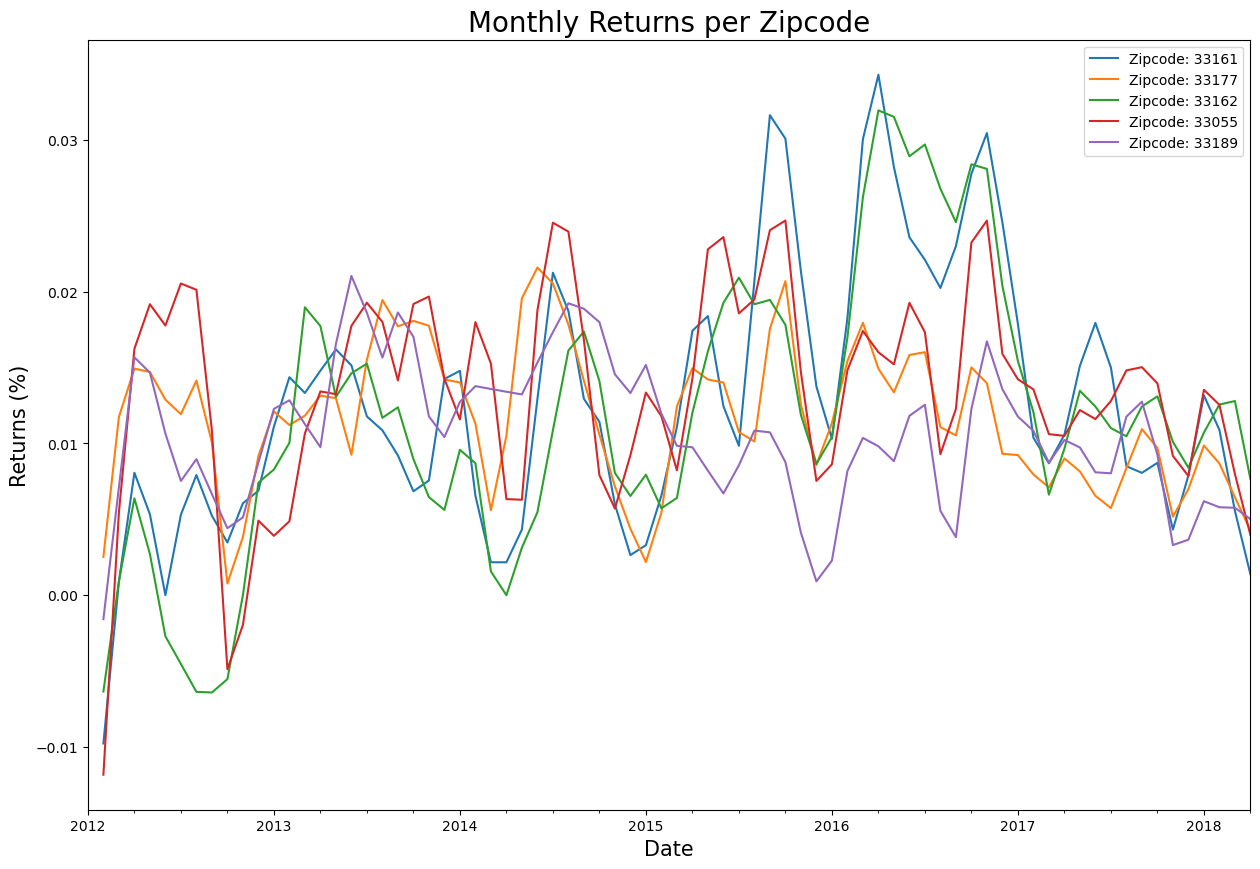

In [27]:
# creating a column called "ret" representing monthly returns on investment
for zc in range(len(df_ts)):
    df_ts[zc]['ret']=np.nan*len(df_ts[zc])
    for i in range(len(df_ts[zc])-1):
        df_ts[zc]['ret'][i+1]= (df_ts[zc].Price.iloc[i+1] / df_ts[zc].Price.iloc[i]) - 1

#Plot the monthly returns of each zipcode
for i in range(len(df_ts)):
    df_ts[i].ret.plot(figsize=(15,10),label=f"Zipcode: {df_ts[i].Zipcode[0]}")
    plt.title(f'Monthly Returns per Zipcode',fontsize=20)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Returns (%)',fontsize=15)
    plt.legend(loc='best') 

The plot above does not provide a clear insight to whether the data has stationarity.rather the data seems to be non_stationary.which is an assumption to build the model. A helpful visualization is to plot the monthly returns along with its rolling mean and standard deviation which should not display a trend for the data to be stationary.we will proceed to investigate further.

#### 4.1.1 Rolling Mean and Standard Deviation 

ADF Test Results for Zipcode: 33161
Test Statistic: -1.9985815936460933
p-Value: 0.287195367035744
Used Lags: 4
Observations: 70
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653


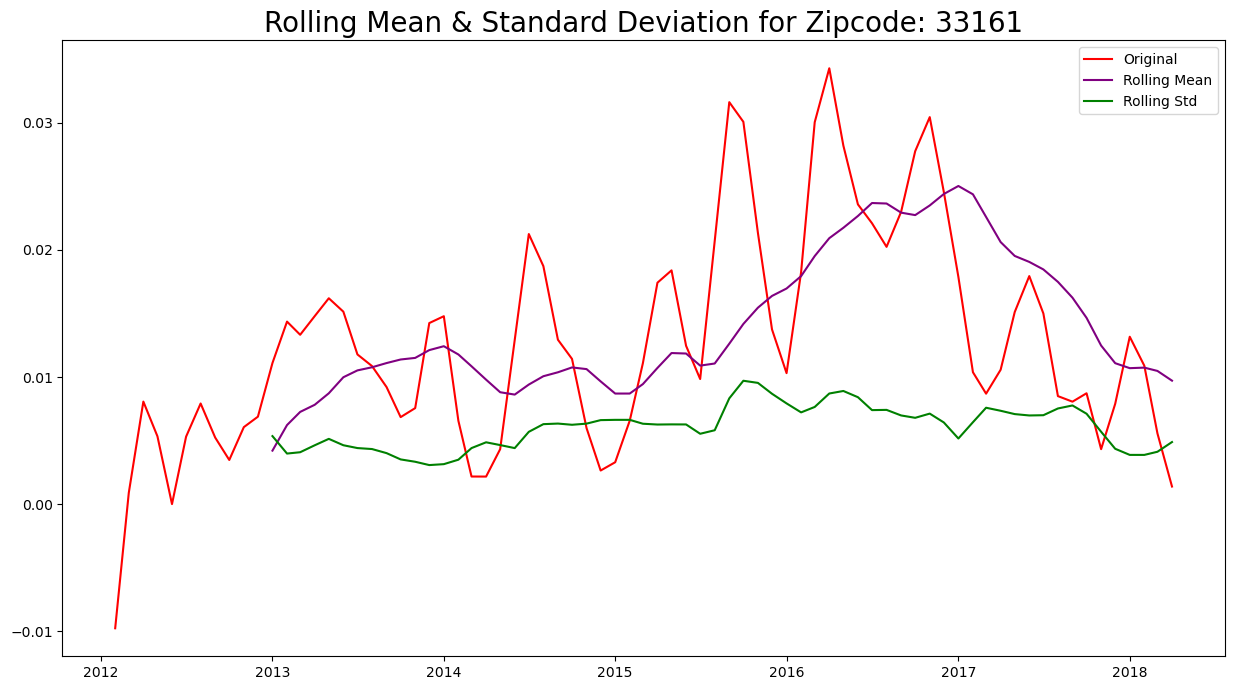

ADF Test Results for Zipcode: 33177
Test Statistic: -2.5972818333032333
p-Value: 0.09356035960709014
Used Lags: 4
Observations: 70
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653


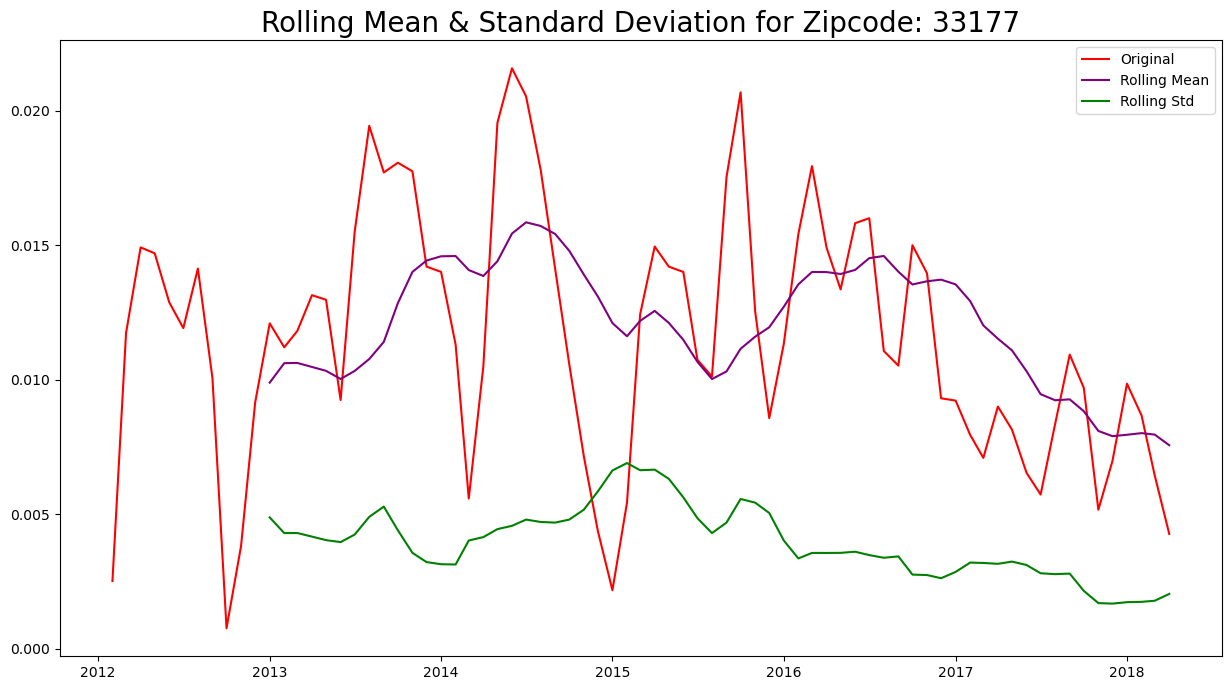

ADF Test Results for Zipcode: 33162
Test Statistic: -2.3506972329241
p-Value: 0.15613774680147385
Used Lags: 4
Observations: 70
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653


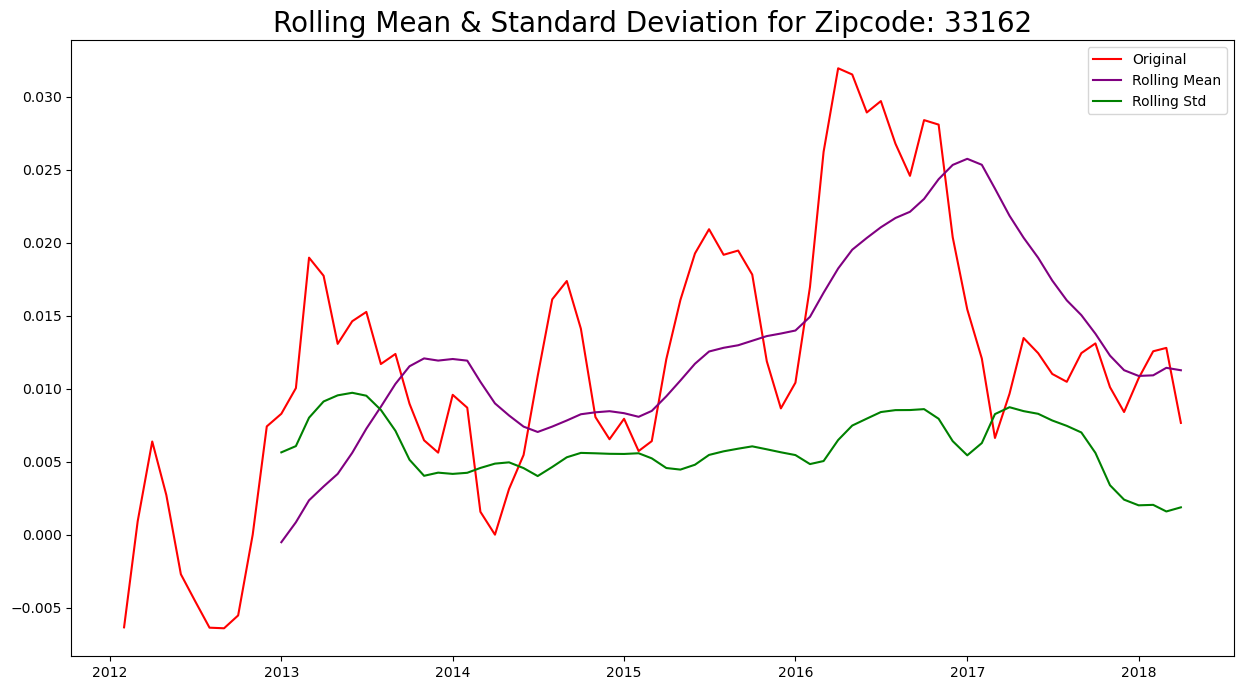

ADF Test Results for Zipcode: 33055
Test Statistic: -4.089252727635688
p-Value: 0.001008908590864285
Used Lags: 3
Observations: 71
Critical Values:
   1%: -3.526004646825607
   5%: -2.9032002348069774
   10%: -2.5889948363419957


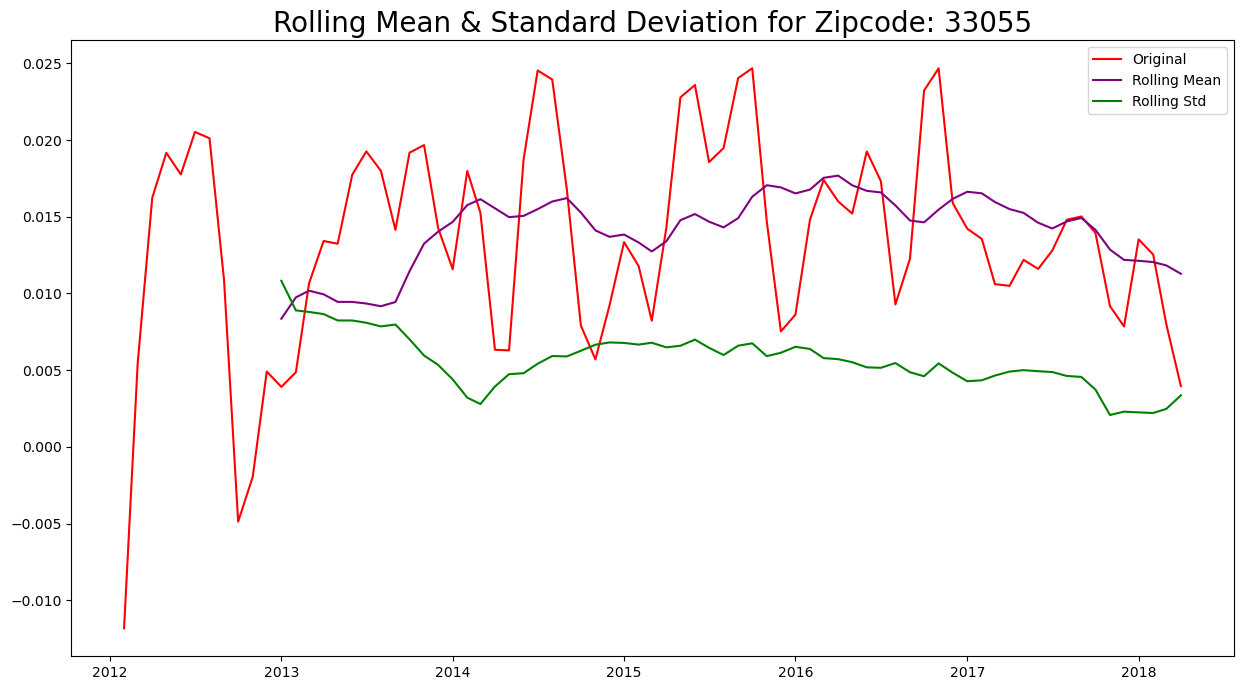

ADF Test Results for Zipcode: 33189
Test Statistic: -2.329789102289516
p-Value: 0.16254028051544755
Used Lags: 3
Observations: 71
Critical Values:
   1%: -3.526004646825607
   5%: -2.9032002348069774
   10%: -2.5889948363419957


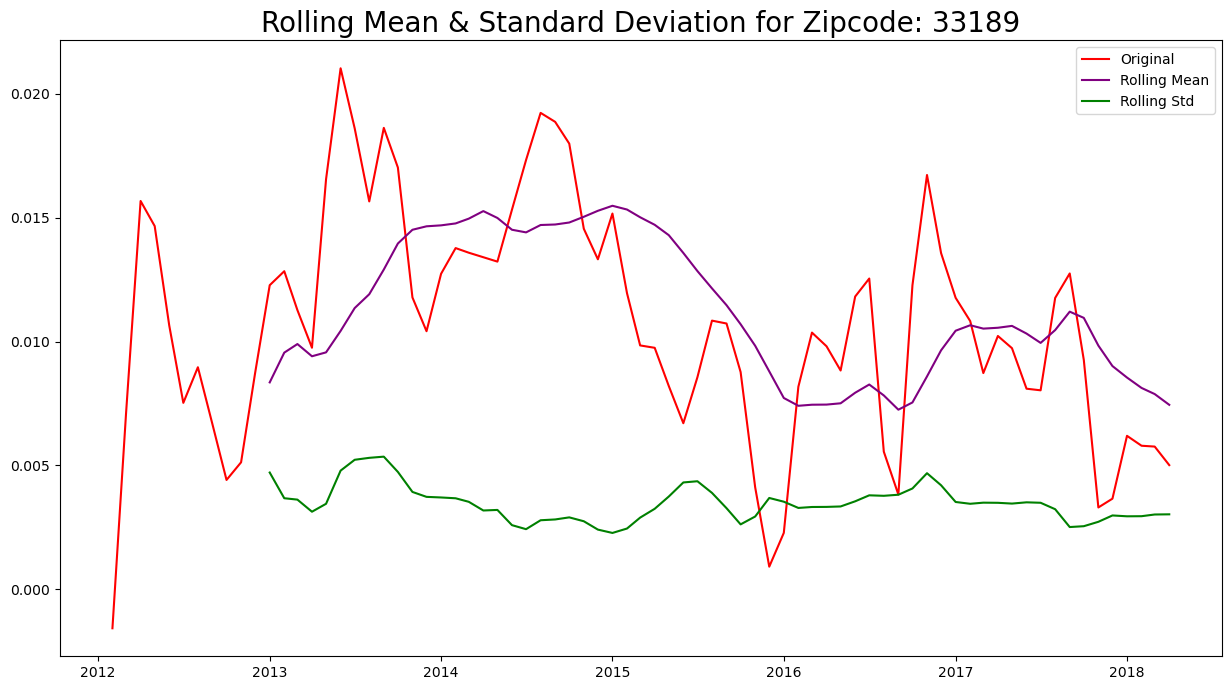

In [28]:
# Testing for stationarity of the zipcodes
# Plot each of the zipcodes’ returns with their respective rolling mean and rolling standard deviation
for i in range(len(df_ts)):
    rollingmean = df_ts[i].ret.rolling(window=12, center=False).mean()
    rollingstd = df_ts[i].ret.rolling(window=12, center=False).std()
    fig = plt.figure(figsize=(15, 8))
    original = plt.plot(df_ts[i].ret, color="red", label="Original")
    mean = plt.plot(rollingmean, color="purple", label="Rolling Mean")
    std = plt.plot(rollingstd, color="green", label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Zipcode: {df_ts[i].Zipcode[0]}', fontsize=20)

    # Perform ADF test
    adf_result = adfuller(df_ts[i].ret.dropna())
    print('ADF Test Results for Zipcode:', df_ts[i].Zipcode[0])
    print('Test Statistic:', adf_result[0])
    print('p-Value:', adf_result[1])
    print('Used Lags:', adf_result[2])
    print('Observations:', adf_result[3])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'   {key}: {value}')

    plt.show()

For Zipcodes 33161, 33177, 33162, and 33189: The p-values are greater than 0.05, indicating that we fail to reject the null hypothesis at a 5% significance level. Therefore, we cannot conclude that these series are stationary.

For Zipcodes 33055: The p-value is very small (0.001), indicating strong evidence against the null hypothesis. However, a visual inspection is not accurate enough to just rely on it and proceed with fitting an ARIMA model. Therefore, it is necessary to perform an Augmented Dickey-Fuller test for stationarity.


#### 4.1.2 Augmented Dickey-Fuller Test
The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary or not.To perform the Dickey-Fuller test in Python, you can use the adfuller function from the statsmodels library.

In [29]:
# Function to perform Dickey-Fuller test and print results
def perform_adfuller_test(data, zipcode):
    result = adfuller(data)
    print(f'ADF Test Results for Zipcode: {zipcode}')
    print(f'Test Statistic: {result[0]}')
    print(f'p-Value: {result[1]}')
    print(f'Used Lags: {result[2]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Perform Dickey-Fuller test for each zip code's time series data
for df_zip in df_ts:
    zipcode = df_zip['Zipcode'].iloc[0]
    perform_adfuller_test(df_zip['Price'], zipcode)


ADF Test Results for Zipcode: 33161
Test Statistic: -1.6981345622410102
p-Value: 0.43207386192735786
Used Lags: 5
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653
ADF Test Results for Zipcode: 33177
Test Statistic: 0.24210699808302313
p-Value: 0.9745267922234481
Used Lags: 5
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653
ADF Test Results for Zipcode: 33162
Test Statistic: -0.38166850938443847
p-Value: 0.913114781418502
Used Lags: 5
Critical Values:
   1%: -3.5274258688046647
   5%: -2.903810816326531
   10%: -2.5893204081632653
ADF Test Results for Zipcode: 33055
Test Statistic: 1.9238745233216983
p-Value: 0.99856547662178
Used Lags: 4
Critical Values:
   1%: -3.526004646825607
   5%: -2.9032002348069774
   10%: -2.5889948363419957
ADF Test Results for Zipcode: 33189
Test Statistic: -0.018881846049889132
p-Value: 0.9569424352394007
Used Lags: 4
Critical Values:
   1%: -3.526004646825607


##### Null hypothesis(the series is stationary);
For Zipcode 33161: Test Statistic is -1.698, which is greater than the critical values at all significance levels (1%, 5%, and 10%). This suggests that we fail to reject the null hypothesis, indicating that the series is non-stationary.

For Zipcodes 33177, 33162, and 33189: Test Statistic is 0.242, -0.382, and -0.019 respectively. In each case, the test statistic is greater than the critical values, indicating non-stationarity.

For Zipcode 33055: Test Statistic is 1.924, which is less than the critical values at all significance levels. This suggests rejecting the null hypothesis, indicating that the series is stationary.

We need our series to be stationary for modeling. we now go a step further and perform differencing.

#### 4.1.3 Differencing

Is often applied to achieve stationarity by removing trends or seasonal components from the time series data. If the original series is non-stationary (which is the case for zip codes 33161 33177, 33162, and 33189), differencing is necessary to make the series stationary before further analysis or modeling.

In [30]:
# Differencing the non-stationary zip codes
for i in range(len(df_ts)):
    # Perform adfuller test and drop NaN values created when calculating monthly returns.
    diff_series = df_ts[i].ret.diff().dropna()
    
    # Print differenced time series data
    print(f"Differenced Time Series for Zipcode {df_ts[i].Zipcode.iloc[0]}:")
    print(diff_series)
    
    # Perform ADFuller test
    results = adfuller(diff_series)
    print(f'ADFuller test p-value for zipcode: {df_ts[i].Zipcode.iloc[0]}')
    print('p-value:', results[1])

    if results[1] > 0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')


Differenced Time Series for Zipcode 33161:
Date
2012-03-01    0.010666
2012-04-01    0.007168
2012-05-01   -0.002731
2012-06-01   -0.005333
2012-07-01    0.005305
                ...   
2017-12-01    0.003568
2018-01-01    0.005276
2018-02-01   -0.002279
2018-03-01   -0.005329
2018-04-01   -0.004177
Freq: MS, Name: ret, Length: 74, dtype: float64
ADFuller test p-value for zipcode: 33161
p-value: 0.38513738292395716
Fail to reject the null hypothesis. Data is not stationary.

Differenced Time Series for Zipcode 33177:
Date
2012-03-01    0.009222
2012-04-01    0.003180
2012-05-01   -0.000219
2012-06-01   -0.001823
2012-07-01   -0.000959
                ...   
2017-12-01    0.001812
2018-01-01    0.002872
2018-02-01   -0.001181
2018-03-01   -0.002225
2018-04-01   -0.002178
Freq: MS, Name: ret, Length: 74, dtype: float64
ADFuller test p-value for zipcode: 33177
p-value: 4.038332664890404e-07
Reject the null hypothesis. Data is stationary.

Differenced Time Series for Zipcode 33162:
Date
20

After differencing we note a marked improvement but not all data is stationary.

In [31]:
# Function to perform seasonal differencing
def seasonal_difference(series, period):
    return series.diff(period)

# Apply seasonal differencing for specific zipcodes
zipcodes_to_difference = ['33161', '33189']  # Specify the zipcodes requiring seasonal differencing
for i in range(len(df_ts)):
    zipcode = df_ts[i]['Zipcode'].iloc[0]
    if zipcode in zipcodes_to_difference:
        df_ts[i]['seasonal_diff'] = seasonal_difference(df_ts[i]['ret'], 12)  

# Perform ADF test for each zipcode after seasonal differencing
for i in range(len(df_ts)):
    zipcode = df_ts[i]['Zipcode'].iloc[0]
    if zipcode in zipcodes_to_difference:
        print(f"ADF Test Results for Zipcode: {zipcode} (after seasonal differencing)")
        results = adfuller(df_ts[i]['seasonal_diff'].dropna())
        print("Test Statistic:", results[0])
        print("p-Value:", results[1])
        print("Used Lags:", results[2])
        print("Critical Values:")
        for key, value in results[4].items():
            print(f"   {key}: {value}")
        if results[1] > 0.05:
            print("Fail to reject the null hypothesis. Data is not stationary.\n")
        else:
            print("Reject the null hypothesis. Data is stationary.\n")


ADF Test Results for Zipcode: 33161 (after seasonal differencing)
Test Statistic: -2.1049710281500675
p-Value: 0.24252043008518293
Used Lags: 9
Critical Values:
   1%: -3.560242358792829
   5%: -2.9178502070837
   10%: -2.5967964150943397
Fail to reject the null hypothesis. Data is not stationary.

ADF Test Results for Zipcode: 33189 (after seasonal differencing)
Test Statistic: -3.103598246142722
p-Value: 0.02628804561183196
Used Lags: 9
Critical Values:
   1%: -3.560242358792829
   5%: -2.9178502070837
   10%: -2.5967964150943397
Reject the null hypothesis. Data is stationary.



We can observe after performing a seasonality differencing we achieved stationarity in zipcode 33189 so we are left with zipcode 33161.Therefore, we know that for the 1 non-stationary zip code, the ‘I’ parameter (integration) of the ARIMA model is going to be 1.

# Step 5: Modelling

Befoe modelling we need to save the new time series data.This code below saves the time series data after differencing for each zipcode to separate files. 

In [32]:
# Save time series data after differencing for each zipcode to separate files
ts_33161 = df_ts[0]['seasonal_diff'].diff().dropna() # Use seasonal differenced data for 33161
ts_33177 = df_ts[1]['ret'].diff().dropna()
ts_33162 = df_ts[2]['ret'].diff().dropna()
ts_33055 = df_ts[3]['ret'].diff().dropna()
ts_33189 = df_ts[4]['seasonal_diff'].dropna() # Use seasonal differenced data for 33189


#### SARIMA MODEL.
Also known in full Seasonal AutoRegressive Integrated Moving Average.SARIMA models are a powerful tool for time series forecasting, commonly used for time series forecasting especially when dealing with data that exhibits both trend and seasonal patterns.It has the capability to handle seasonality which is what data from Zipcode 33161 has after differencing time series and going a step further and executing seasonal differencing with no change. 

NOTE;When using SARIMA models for time series forecasting, it's essential to identify and specify the appropriate seasonal parameters (such as seasonal period and seasonal AR, I, and MA orders) based on the characteristics of the data. Once the SARIMA model is fitted to the historical data, it can be used to generate forecasts for future time periods.

Below is a justification for using SARIMA model apart from the reason stated above.Handling Seasonality: SARIMA models are specifically designed to handle time series data that exhibit both trend and seasonal patterns. Since the ROI data for Zipcode 33161 shows clear seasonal patterns even after differencing the time series, SARIMA is well-suited to capture and model these seasonal fluctuations.It also Accomodates trends,Flexible,Statictial accuracy and Forecasting accuracy 



#### 5.1 Basic SARIMA Model.

Using a baseline model first is a necessary approach in time series forecasting as it helps in gaining insights into the data, assessing model performance, and guiding subsequent modeling efforts.

#### 5.1.1 Plot (ACF) and (PACF) 
Autocorrelation function and Partial autocorrelation function is a method use to provide insight into the selection of ones (p,d,q) as well as (p,d,q,s) which are our seasonal orders for a SARIMA model.
Hence why it's generally recommended to visually inspect the ACF and PACF plots to guide the selection process, especially when dealing with complex or ambiguous time series patterns.

For one to determine the maximum lag to plot acf and pacf we first check length of our time series data.This information is crucial for determining the appropriate lag values to use when plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) plots.

In [33]:
# Check the length of each time series data
length_ts_33161 = len(ts_33161)
length_ts_33177 = len(ts_33177)
length_ts_33162 = len(ts_33162)
length_ts_33055 = len(ts_33055)
length_ts_33189 = len(ts_33189)

print("Length of ts_33161:", length_ts_33161)
print("Length of ts_33177:", length_ts_33177)
print("Length of ts_33162:", length_ts_33162)
print("Length of ts_33055:", length_ts_33055)
print("Length of ts_33189:", length_ts_33189)


Length of ts_33161: 62
Length of ts_33177: 74
Length of ts_33162: 74
Length of ts_33055: 74
Length of ts_33189: 63


Since the lengths of our series vary slightly, We use a log value that covers at least twice the length of the longest series. In this case, we will use a lag of 30  for plotting ACF and PACF to cover all series adequately.Now, its time to search for seasonality (S) and the AR ( p) and MA (q) parameters of the model that will provide a best fit for each of the zip codes.

The AR and MA parameters can be estimated using the autocorrelation function (ACF) and partial autocorrelation function (PACF)plots of the stationary time series



In [34]:
def plot_acf_pacf_for_series(series, series_name, lags=30):
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Plot ACF
    plot_acf(series, ax=axes[0], lags=lags)
    axes[0].set_title(f'Autocorrelation Function (ACF) for {series_name}')

    # Plot PACF
    plot_pacf(series, ax=axes[1], lags=lags)
    axes[1].set_title(f'Partial Autocorrelation Function (PACF) for {series_name}')

    plt.tight_layout()
    plt.show()

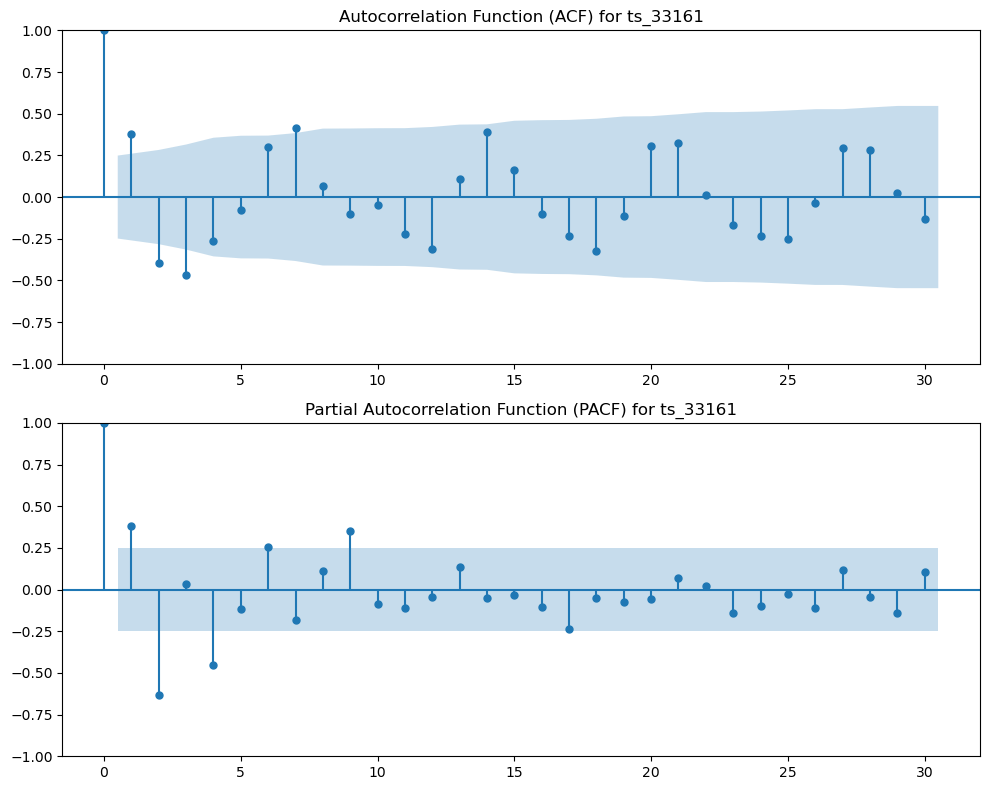

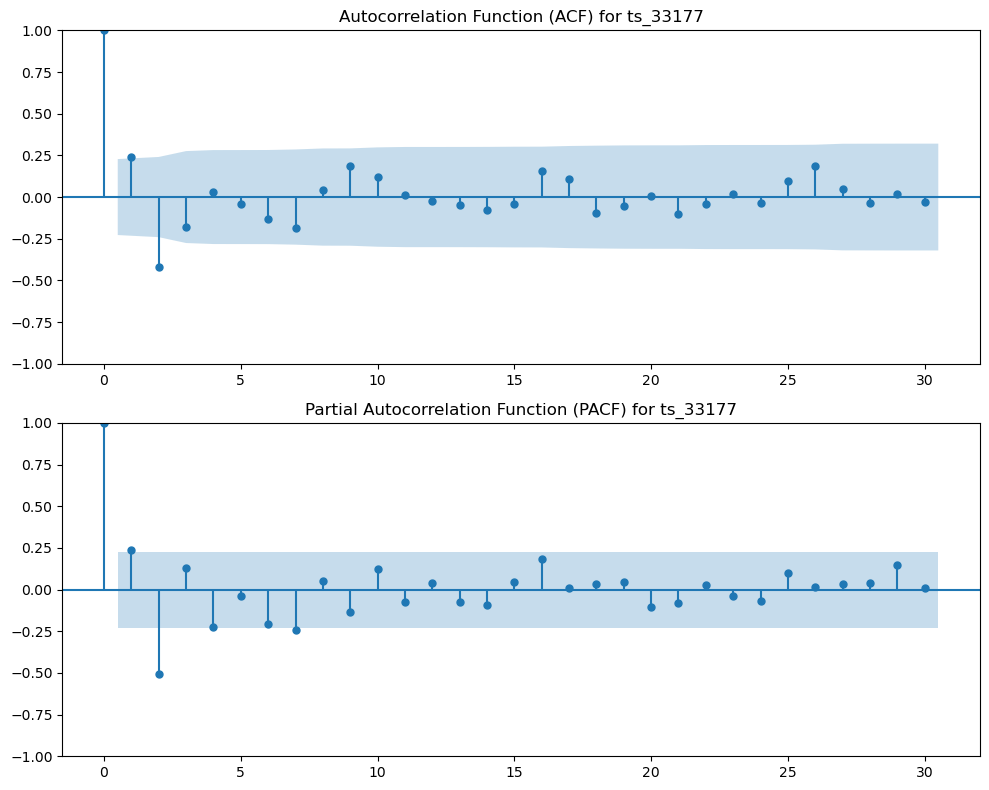

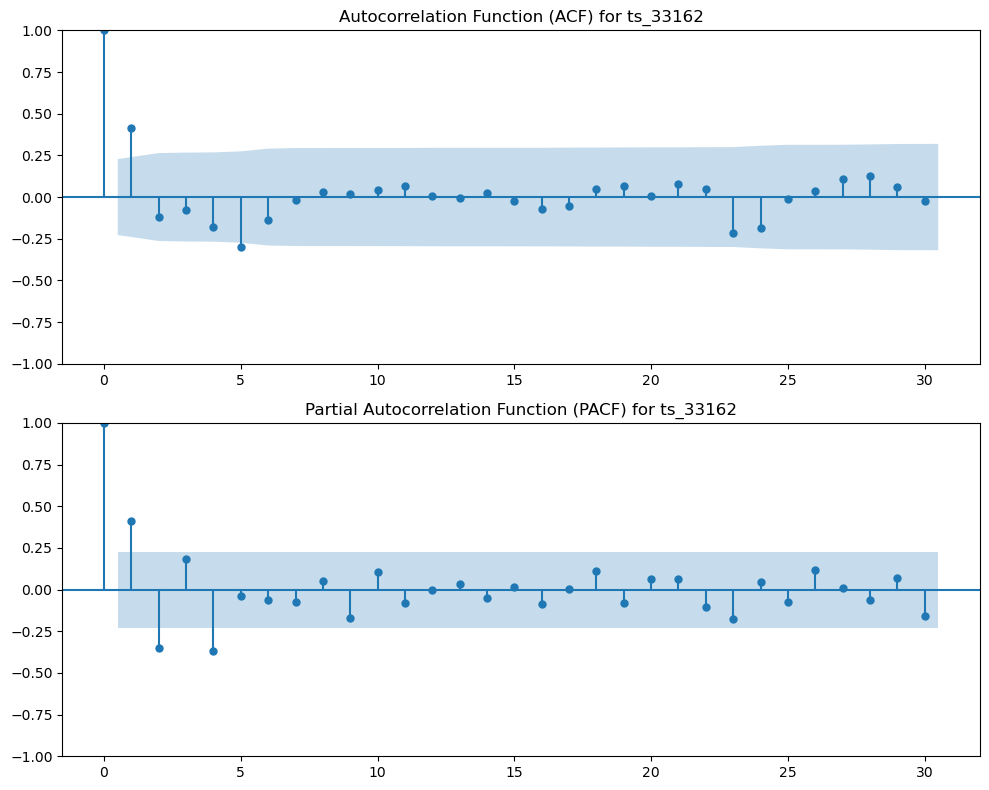

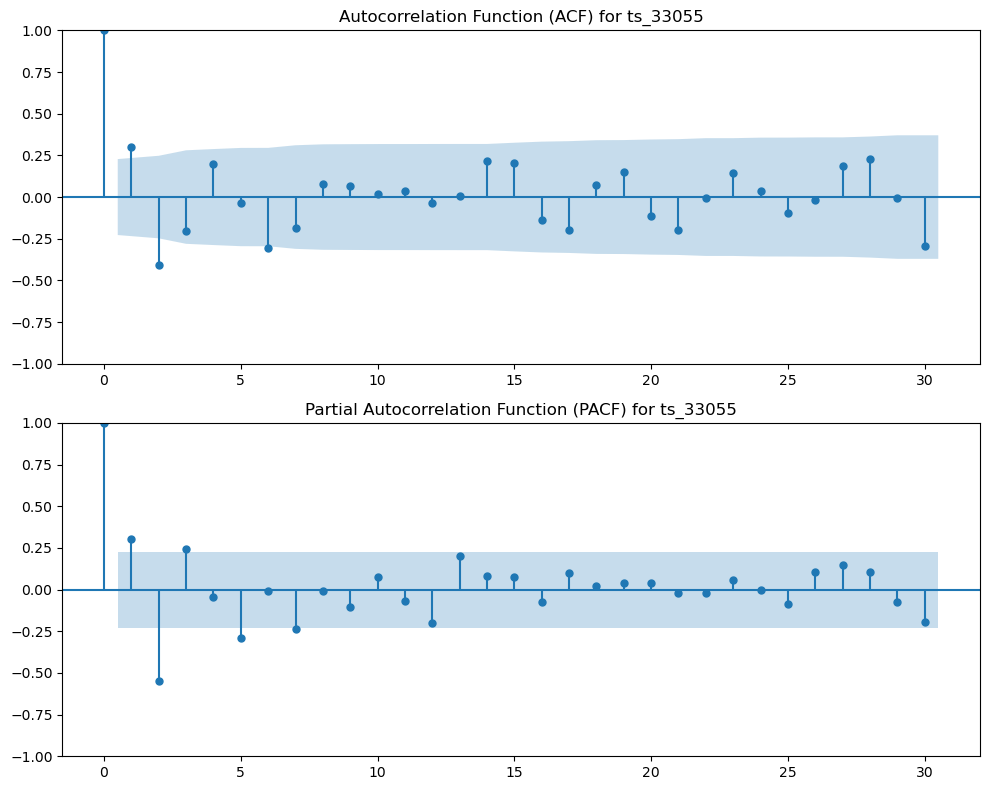

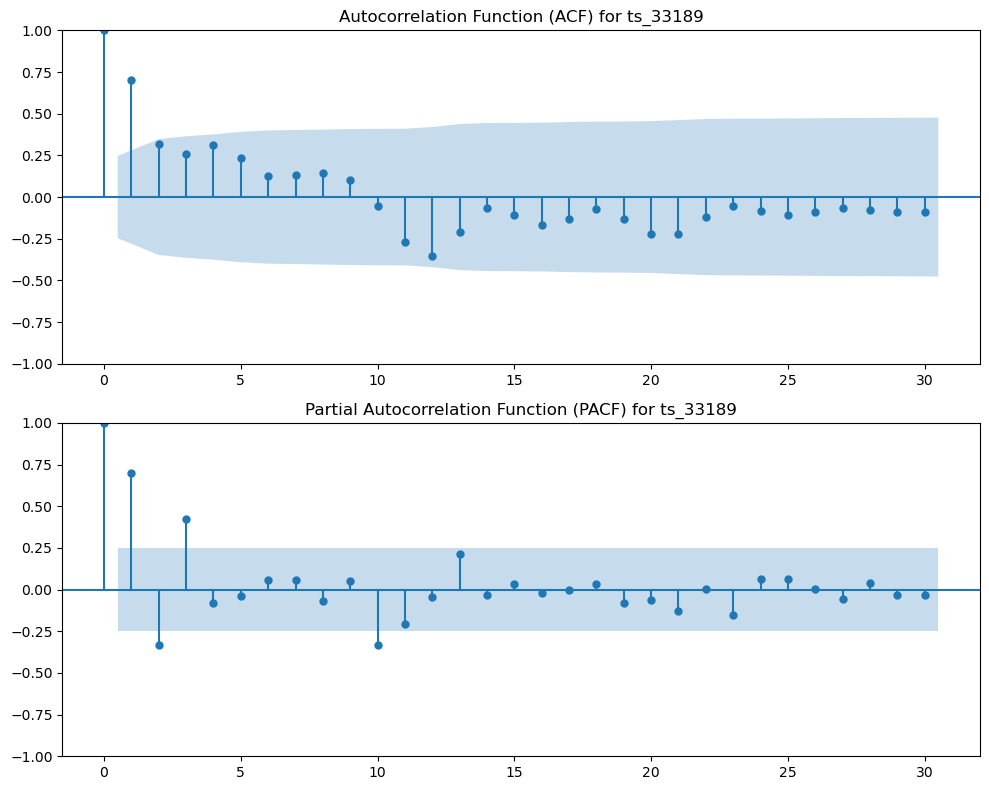

In [35]:
plot_acf_pacf_for_series(ts_33161, 'ts_33161', lags=30)
plot_acf_pacf_for_series(ts_33177, 'ts_33177', lags=30)
plot_acf_pacf_for_series(ts_33162, 'ts_33162', lags=30)
plot_acf_pacf_for_series(ts_33055, 'ts_33055', lags=30)
plot_acf_pacf_for_series(ts_33189, 'ts_33189', lags=30)


## BASELINE SARIMA MODEL 

To aid me in the process of finding the best values for the parameters I used pmdarima autoarima function to get this values.

In [36]:
# Define the time series data for each zipcode
ts_list = [ts_33161, ts_33177, ts_33162, ts_33055, ts_33189]

# Loop through each time series data
for i, ts in enumerate(ts_list, start=1):
    # Fit SARIMA model to the time series data
    results = pm.auto_arima(ts,
                             information_criterion='aic',
                             m=12,
                             d=0,
                             start_p=1,
                             start_q=1,
                             max_p=3,
                             max_q=3,
                             stepwise=True,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True)
    
    # Print the results for the current zipcode
    print(f"Results for ts_{zipcode}:")
    print(results.summary())
    print("\n")


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=-476.484, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-426.561, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-443.369, Time=0.40 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-478.217, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-428.244, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-456.292, Time=0.15 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-476.019, Time=0.58 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-476.993, Time=0.86 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-463.601, Time=0.42 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=-466.800, Time=0.40 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : 

 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-623.241, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-637.480, Time=0.19 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=-641.323, Time=0.07 sec
 ARIMA(0,0,1)(1,0,0)[12]             : AIC=-640.538, Time=0.26 sec
 ARIMA(0,0,1)(0,0,1)[12]             : AIC=-635.411, Time=0.13 sec
 ARIMA(0,0,1)(1,0,1)[12]             : AIC=-632.464, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=-639.676, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[12]             : AIC=-622.022, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=-625.134, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[12]             : AIC=-634.713, Time=0.12 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12]          
Total fit time: 4.417 seconds
Results for ts_33189:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   74
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 3

 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-447.390, Time=0.04 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-540.203, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-518.240, Time=0.26 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=-543.244, Time=1.20 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=-539.234, Time=1.41 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=-523.300, Time=1.34 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(2,0,1)(0,0,2)[12] intercept   : AIC=-542.129, Time=1.65 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=-550.684, Time=1.55 sec
 ARIMA(0,0,2)(0,0,1)[12] intercept   : AIC=-548.482, Time=0.32 sec
 ARIMA(0,0,2)(1,0,2)[12] intercept   : AIC=-546.260, Time=1.75 sec
 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=-536.702, Time=0.33 sec
 ARIMA(0,0,3)(0

the time series data ts_33189, the best SARIMA model selected by the function is SARIMA(0, 0, 3)(0, 0, [1, 2], 12), which indicates a seasonal ARIMA model with zero order non-seasonal differencing,The AIC value for this model is -551.385, which is used as a criterion for model selection.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.20016D+00    |proj g|=  3.35985D+01


 This problem is unconstrained.



At iterate    5    f= -4.20447D+00    |proj g|=  1.22990D+00

At iterate   10    f= -4.20641D+00    |proj g|=  2.60630D+01

At iterate   15    f= -4.36907D+00    |proj g|=  1.35909D+02

At iterate   20    f= -4.43522D+00    |proj g|=  1.31218D+00

At iterate   25    f= -4.43970D+00    |proj g|=  2.02060D+00

At iterate   30    f= -4.46420D+00    |proj g|=  1.77425D-01

At iterate   35    f= -4.46520D+00    |proj g|=  5.09103D-01

At iterate   40    f= -4.47559D+00    |proj g|=  4.54082D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     65      1     0     0   1.424D-01  -4.476D+00
  F =  -4.4755936605044990     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                        SARIMAX Results                                        
Dep. Variable:                           seasonal_diff   No. Observations:                   63
Model:             SARIMAX(0, 0, 3)x(0, 0, [1, 2], 12)   Log Likelihood                 281.962
Date:                                 Fri, 22 Mar 2024   AIC                           -551.925
Time:                                  

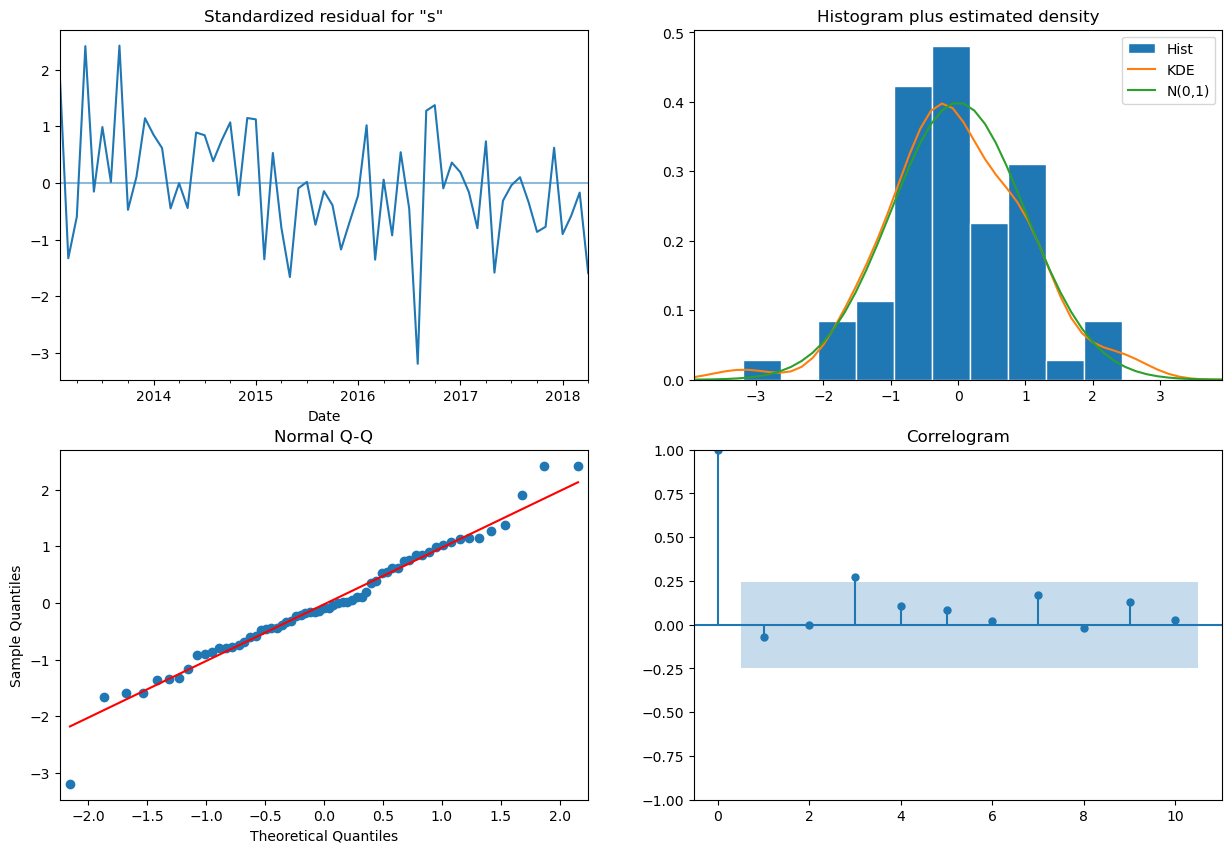

In [37]:
# Define SARIMA model parameters
order = (0, 0, 3)
seasonal_order = (0, 0, [1, 2], 12)

# Fit SARIMA model
model = SARIMAX(ts_33189, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Print model summary
print(results.summary())

# Plot residual diagnostics
results.plot_diagnostics(figsize=(15, 10))
plt.show()

the above residual plots show a slight deviation from normality but might not significantly impact the model's validity, especially for forecasting purposes.

In [51]:
from sklearn.model_selection import train_test_split

def train_test_split(ts, test_size=0.2):
    """
    Splits the time series data into training and testing sets.

    Args:
        ts (pandas.Series): The time series data.
        test_size (float, optional): The proportion of the dataset to include in the test split. Defaults to 0.2.

    Returns:
        tuple: A tuple containing the training and testing sets.
    """
    train_size = int(len(ts) * (1 - test_size))
    train, test = ts[:train_size], ts[train_size:]
    return train, test


In [56]:
def model_fit(ts, order=(0, 0, 3), seasonal_order=(0, 0, [1, 2], 12)):
    train, test = train_test(ts)
    model = SARIMAX(train,order=order,seasonal_order=seasonal_order)
    results = model.fit()
    results.summary
    residuals = results.resid
    print(results.summary())
    results.plot_diagnostics(figsize=(11,8))
    plt.show();
    return train, test, results

def test_RMSE(ts, order=(0, 0, 3), seasonal_order=(0, 0, [1, 2], 12), display=True):
    X = ts.values
    train, test = X[:-36],X[-36:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = SARIMAX(history, order=order,seasonal_order=seasonal_order)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(MSE(test, predictions))
    print('SARIMA model RMSE on test data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        plt.title('Actual Test Data vs. Predictions')
        plt.plot(history[-36:],label='Actual', color='b')
        plt.plot(predictions,label='Predictions',color='r')
        plt.legend(loc='best')
        plt.show()

def train_RMSE(train, results, display = True):
    train_pred = results.predict(start=train.index[0], end=train.index[-1])  # Use training data indices
    rmse = sqrt(MSE(train[-len(train):], train_pred))
    print(f'SARIMA model RMSE on train data: %.5f' % rmse)
    if display:
        plt.figure(figsize=(13,6))
        train[-60:].plot(label='Actual',color='b')
        train_pred.plot(label='Predicted',color='r')
        plt.legend(loc='best')
        plt.title('Actual Train Data vs. Predicted Returns')
        plt.show()

SARIMA model RMSE on train data: 0.00434


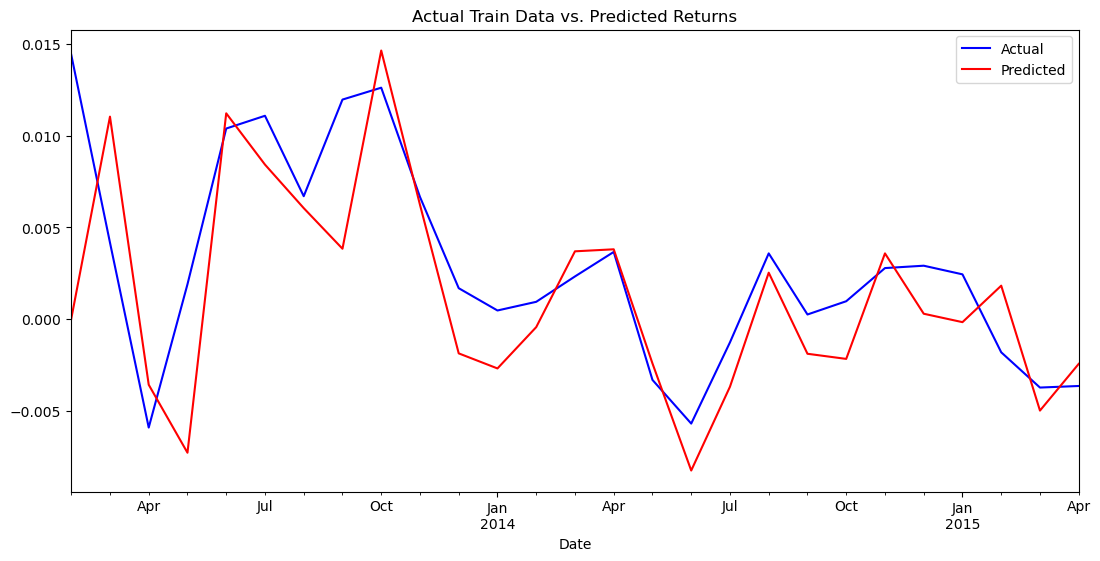

In [57]:
train_RMSE(train, results)

SARIMA model RMSE on test data: 0.00288


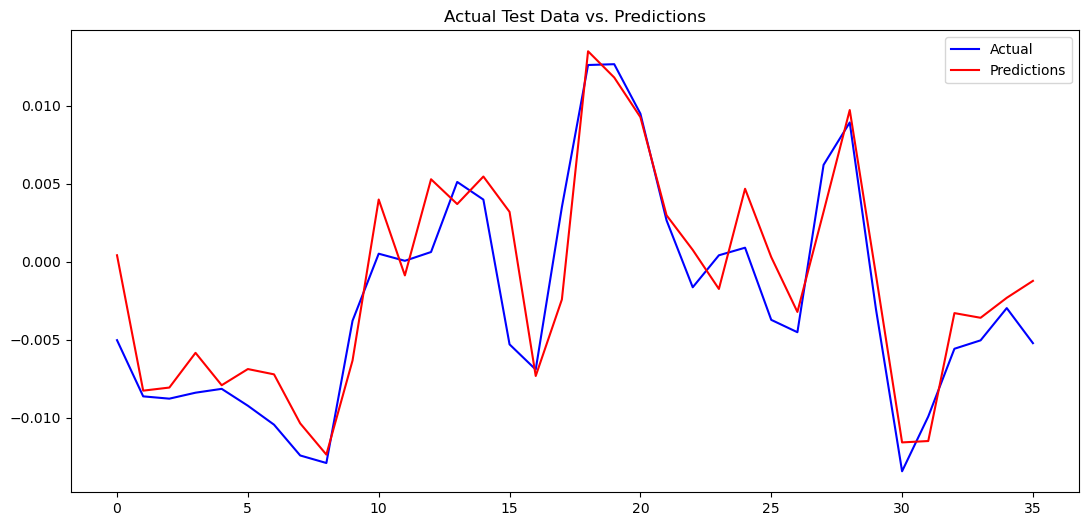

In [59]:
test_RMSE(ts_33189, order=order, seasonal_order=seasonal_order)

lower RMSE values indicate better model performance, as they signify smaller deviations between predicted and actual values. Therefore, in this case, the SARIMA model seems to perform better on the test data compared to the training data, as the RMSE value is smaller for the test data.Yes, you can proceed to use the SARIMA model to make a 3-year forecast.

# Step 6: 3 Year Forecast.

In [63]:
# Import necessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the time series data for each zipcode
ts_list = [ts_33161, ts_33177, ts_33162, ts_33055, ts_33189]

# Define the order and seasonal_order parameters for the SARIMA model
order = (0, 0, 3)  # Example order
seasonal_order = (0, 0, [1, 2], 12)  # Example seasonal_order

# Dictionary to store forecast results for each zipcode
forecast_results = {}

# Iterate over each time series data for the zip codes
for ts in ts_list:
    # Train a SARIMA model using all the available data for each zipcode
    model = SARIMAX(ts, order=order, seasonal_order=seasonal_order)
    results = model.fit()
    
    # Generate forecasts for the next 3 years (36 months) for each zipcode
    forecast = results.forecast(steps=36)
    
    # Calculate total expected returns for 1 year, 3 years, 5 years, and 10 years
    year_1 = (1 + forecast[:12]).prod() - 1
    year_2 = (1 + forecast[:24]).prod() - 1
    year_3 = (1 + forecast[:36]).prod() - 1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.86983D+00    |proj g|=  5.47352D+01

At iterate    5    f= -3.90033D+00    |proj g|=  2.94354D-01

At iterate   10    f= -3.90083D+00    |proj g|=  9.38717D+00

At iterate   15    f= -3.94970D+00    |proj g|=  9.85352D+01

At iterate   20    f= -3.99471D+00    |proj g|=  1.97584D-01

At iterate   25    f= -3.99511D+00    |proj g|=  6.33654D+00

At iterate   30    f= -4.02289D+00    |proj g|=  3.78608D+01

At iterate   35    f= -4.05237D+00    |proj g|=  3.55878D+00

At iterate   40    f= -4.05301D+00    |proj g|=  3.57699D+00

At iterate   45    f= -4.09870D+00    |proj g|=  3.83098D+01

At iterate   50    f= -4.11664D+00    |proj g|=  2.01149D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.49301D+00    |proj g|=  3.41195D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     51      2     0     0   1.278D+00  -4.495D+00
  F =  -4.4949951258805694     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.37267D+00    |proj g|=  1.86361D+00



 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     20      1     0     0   8.915D-01  -4.373D+00
  F =  -4.3726743828409926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.14489D+00    |proj g|=  6.81528D+01


 This problem is unconstrained.



At iterate    5    f= -4.15671D+00    |proj g|=  5.57154D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      6     23      1     0     0   5.325D-01  -4.157D+00
  F =  -4.1567115322089974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.20016D+00    |proj g|=  3.35985D+01

At iterate    5    f= -4.20447D+00    |proj g|=  1.22990D+00

At iterate   10    f= -4.20641D+00    |proj g|=  2.60630D+01

At iterate   15    f= -4.36907D+00    |proj g|=  1.35909D+02

At iterate   20    f= -4.43522D+00    |proj g|=  1.31218D+00

At iterate   25    f= -4.43970D+00    |proj g|=  2.02060D+00

At iterate   30    f= -4.46420D+00    |proj g|=  1.77425D-01

At iterate   35    f= -4.46520D+00    |proj g|=  5.09103D-01

At iterate   40    f= -4.47559D+00    |proj g|=  4.54082D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
